In [29]:
import sys
sys.path.append("D:\OneDrive - The Hong Kong Polytechnic University\文件\KOA\code\PatellaDeepShapeModel_2d\models")
sys.path.append("D:\OneDrive - The Hong Kong Polytechnic University\文件\KOA\code\PatellaDeepShapeModel_2d\data_utils")

import numpy as np
import torch
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning import loggers as pl_loggers
from models.interp_model import NN_model_interpreter

from deep_shape_analysis import *
from data_utils.data_loader import *

In [62]:
model_name = 'CirCNN_PFOA'
prediction_target = "PFOA"#'KR_visit'
target_num_pt = 320
mask_dir = r'F:/MOST/MOST-Images (Radiograph & MRI)/MOST Knee Radiographs/inference/AttResNet18-Unet_crop'
img_exclude_csv = 'mask_exclude_list.csv'
weighted_sampling = False
batch_size = 32
self_att = False
loss = 'bce'
lr = 5e-6
loss_alpha = 0.9
find_lr = False

datamodule = ContourDataModule(prediction_target=prediction_target,
                               target_num_pt=target_num_pt,
                               mask_dir=mask_dir,
                               img_exclude_csv=img_exclude_csv,
                               df_fname=r'./data/MOST_0m_clinical_data_left.csv',
                               val_ratio=0.2,
                               random_state=40,
                               weighted_sampling=weighted_sampling,
                               batch_size=batch_size)

model = DeepShapeAnalysis(task=prediction_target,
                          self_att=self_att,
                          loss=loss,
                          lr=lr,
                          loss_alpha=loss_alpha)

logger = pl_loggers.TensorBoardLogger(save_dir="logs/")
trainer = Trainer(accumulate_grad_batches=4,
                  #callbacks=[EarlyStopping(monitor="valid_loss", mode="min")],
                  max_epochs=150,
                  gpus=[0],
                  auto_lr_find=find_lr,
                  logger=logger)

  0%|          | 0/2966 [00:00<?, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


======================== (2199,)
======================== (550,)


In [3]:
trainer.fit(model, datamodule)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


======================== (2150,)
======================== (538,)



  | Name    | Type        | Params
----------------------------------------
0 | model   | CircularFCN | 265 K 
1 | loss_fc | BCELoss     | 0     
----------------------------------------
265 K     Trainable params
0         Non-trainable params
265 K     Total params
1.060     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

D:\Users\User\anaconda3\envs\py3.7\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:245: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 64 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,
D:\Users\User\anaconda3\envs\py3.7\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:245: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 64 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [64]:
model.test(datamodule.val_dataloader(), model_name, threshold=0.5)

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 84.51it/s]

              precision    recall  f1-score   support

    Negative       0.94      0.85      0.89       464
    Positive       0.47      0.72      0.57        86

    accuracy                           0.83       550
   macro avg       0.71      0.79      0.73       550
weighted avg       0.87      0.83      0.84       550

AUROC score: 0.8610164394546913
[[394  70]
 [ 24  62]]


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
        1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
        1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
        1., 

In [6]:
model.save(model_name)

In [63]:
model.load(model_name)

DeepShapeAnalysis(
  (model): CircularFCN(
    (convblock1): CircularConv1dSame(
      (conv1d): Conv1d(2, 128, kernel_size=(7,), stride=(1,), bias=False)
      (bn1d): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (convblock2): CircularConv1dSame(
      (conv1d): Conv1d(128, 256, kernel_size=(5,), stride=(1,), bias=False)
      (bn1d): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (convblock3): CircularConv1dSame(
      (conv1d): Conv1d(256, 128, kernel_size=(3,), stride=(1,), bias=False)
      (bn1d): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (classifier): Sequential(
      (0): GlobalPool1d(
        (0): AdaptiveAvgPool1d(output_size=1)
        (1): Flatten(start_dim=1, end_dim=-1)
      )
      (1): Linear(in_features=128, out_features=1, bias=True)
      (2): Sigmoid()
    )
  )
  (

torch.Size([32, 1, 2, 320])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.])
[0.01065415 0.01062735 0.00985212 0.0095314  0.00968766 0.00931995
 0.01013805 0.00963062 0.00945517 0.00924357 0.00981694 0.00943534
 0.00958816 0.00956927 0.01031161 0.00918582 0.00944377 0.00873647
 0.01015988 0.00996884 0.00826792 0.0101679  0.00906157 0.01088363
 0.01046596 0.01033296 0.01170894 0.01196991 0.01287851 0.01101684
 0.01188142 0.0114938  0.01140292 0.01084656 0.01279462 0.01177699
 0.01173075 0.01161464 0.01142553 0.01194543 0.01202649 0.01187692
 0.01147371 0.01154362 0.01153318 0.01109654 0.01072972 0.0108278
 0.01117677 0.01027097 0.0099002  0.00968105 0.01128895 0.01121805
 0.01085924 0.0107307  0.01114312 0.01156571 0.01130861 0.01130266
 0.01105537 0.01106423 0.01103338 0.01130904 0.01088453 0.01089829
 0.01083744 0.0109562  0.01107008 0.01103015 0.01085445 0.0110787
 0.011517   0.01178864 0.

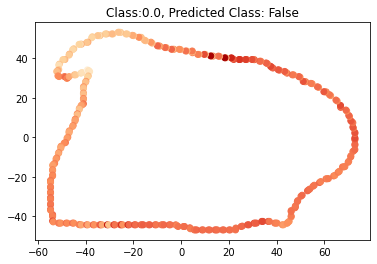

True label: 0.0, Pred label: False, Prob: 0.1492149829864502


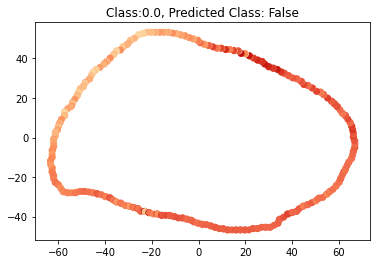

True label: 0.0, Pred label: False, Prob: 0.08910056948661804


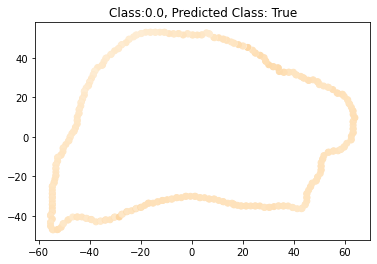

True label: 0.0, Pred label: True, Prob: 0.8103660345077515


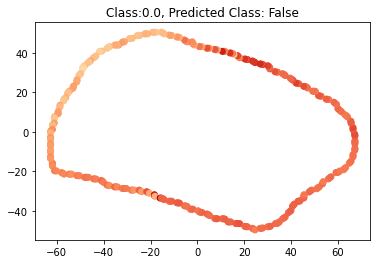

True label: 0.0, Pred label: False, Prob: 0.11337236315011978


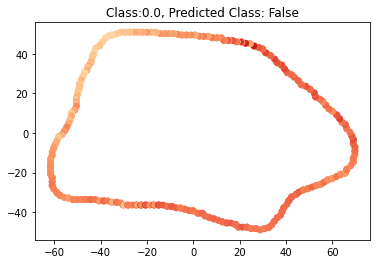

True label: 0.0, Pred label: False, Prob: 0.15116703510284424


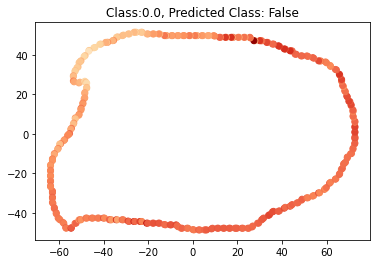

True label: 0.0, Pred label: False, Prob: 0.09885573387145996


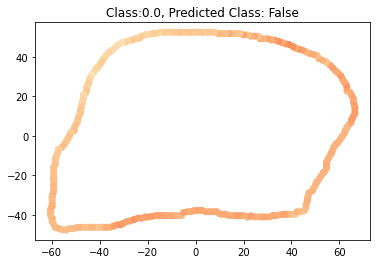

True label: 0.0, Pred label: False, Prob: 0.429828941822052


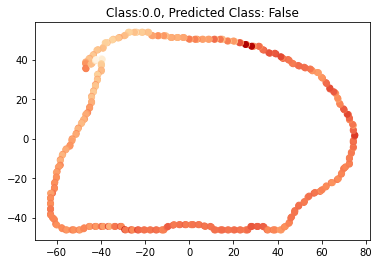

True label: 0.0, Pred label: False, Prob: 0.17767030000686646


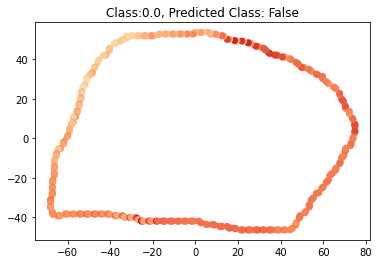

True label: 0.0, Pred label: False, Prob: 0.16619792580604553


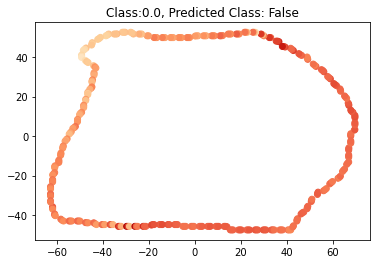

True label: 0.0, Pred label: False, Prob: 0.10375190526247025


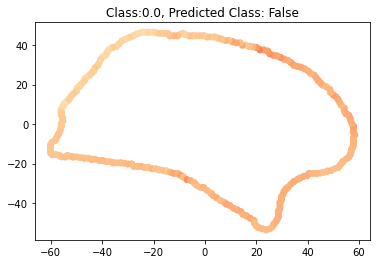

True label: 0.0, Pred label: False, Prob: 0.45188602805137634


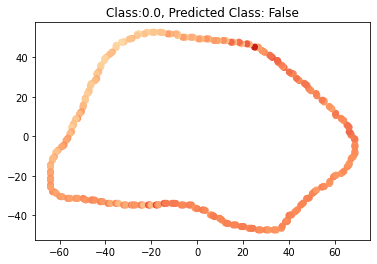

True label: 0.0, Pred label: False, Prob: 0.26246973872184753


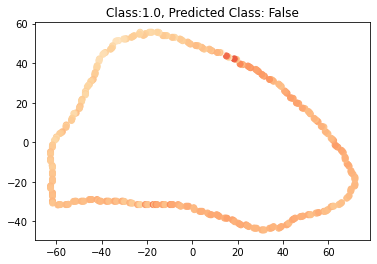

True label: 1.0, Pred label: False, Prob: 0.4432019293308258


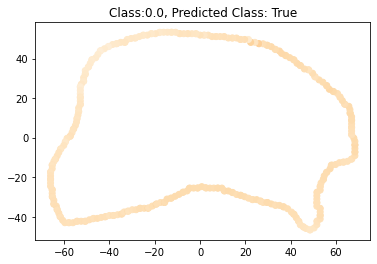

True label: 0.0, Pred label: True, Prob: 0.765923023223877


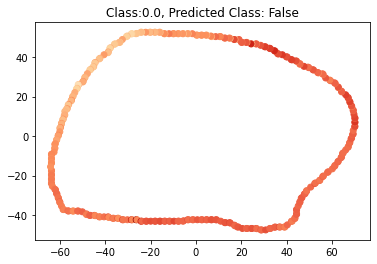

True label: 0.0, Pred label: False, Prob: 0.08337052911520004


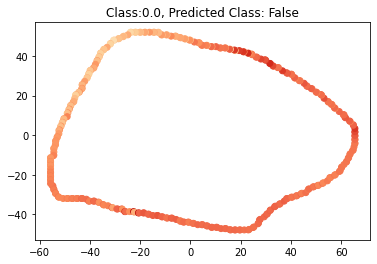

True label: 0.0, Pred label: False, Prob: 0.13711969554424286


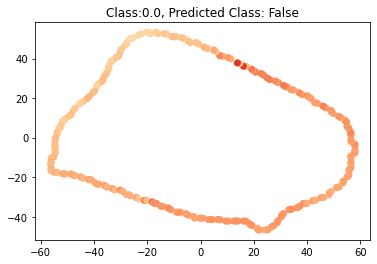

True label: 0.0, Pred label: False, Prob: 0.36088499426841736


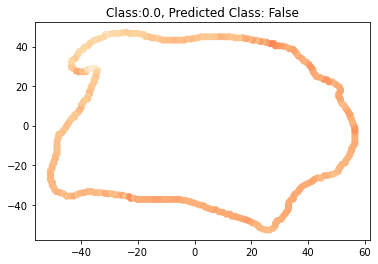

True label: 0.0, Pred label: False, Prob: 0.4306360185146332


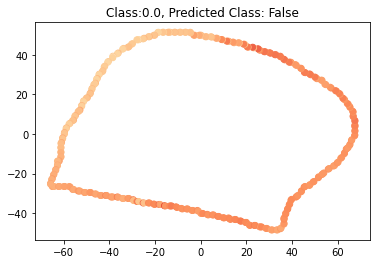

True label: 0.0, Pred label: False, Prob: 0.304167240858078


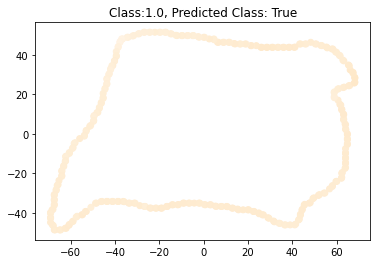

True label: 1.0, Pred label: True, Prob: 0.9027135372161865


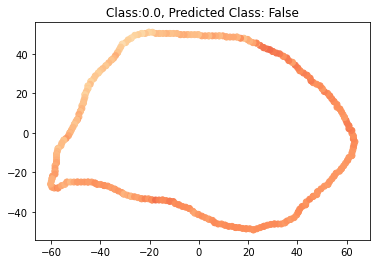

True label: 0.0, Pred label: False, Prob: 0.3074209690093994


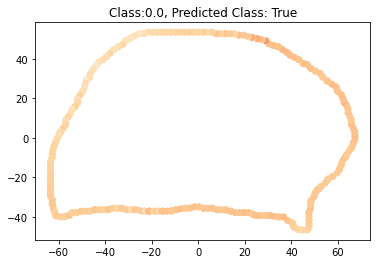

True label: 0.0, Pred label: True, Prob: 0.5730794668197632


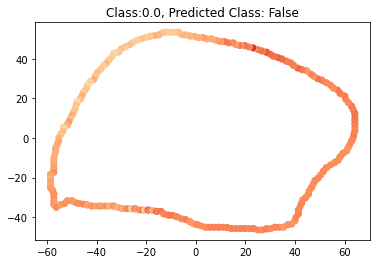

True label: 0.0, Pred label: False, Prob: 0.2679988443851471


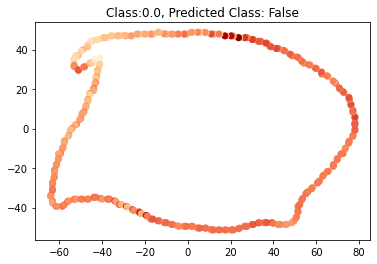

True label: 0.0, Pred label: False, Prob: 0.16245406866073608


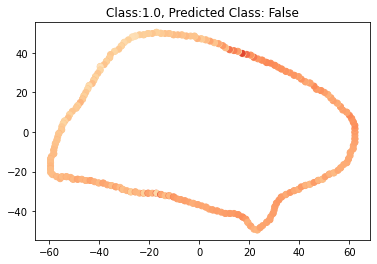

True label: 1.0, Pred label: False, Prob: 0.3869261145591736


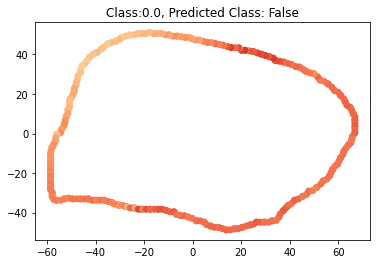

True label: 0.0, Pred label: False, Prob: 0.13253529369831085


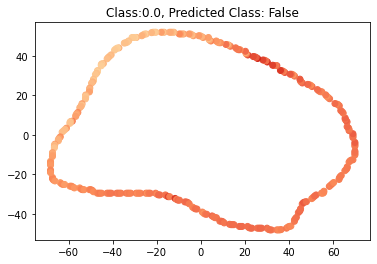

True label: 0.0, Pred label: False, Prob: 0.16609691083431244


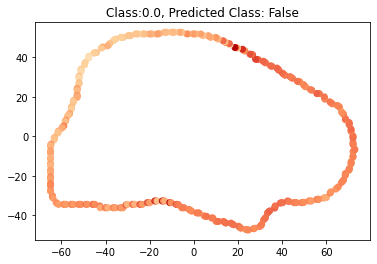

True label: 0.0, Pred label: False, Prob: 0.2078062891960144


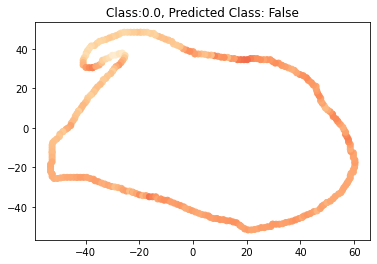

True label: 0.0, Pred label: False, Prob: 0.3705691397190094


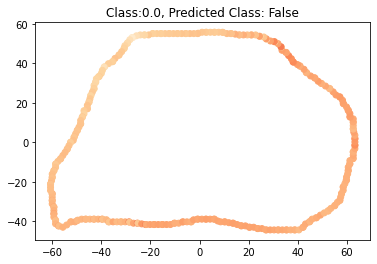

True label: 0.0, Pred label: False, Prob: 0.41418421268463135


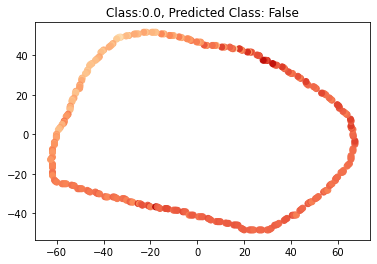

True label: 0.0, Pred label: False, Prob: 0.09360445290803909


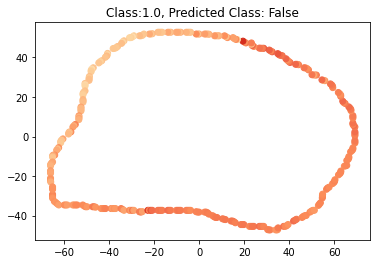

True label: 1.0, Pred label: False, Prob: 0.2340691089630127


In [156]:
# a=20
# b=a+1
# c=a+2
# d=a+3
# e=a+4
# f=a+5
print(contour.shape)
data = list(datamodule.val_dataloader())[7]
contour, label = data
prob = model(contour.to('cuda'))
pred = (prob > 0.5)
# contour_sel = torch.cat((contour[0:4], contour[11:13]), dim=0).to('cuda')
# label_sel = torch.Tensor([label[0], label[1], label[2], label[3], label[11], label[12]])
# pred_sel = torch.Tensor([pred[0], pred[1], pred[2], pred[3], pred[11], pred[12]])
# prob_sel = torch.Tensor([prob[0], prob[1], prob[2], prob[3], prob[11], prob[12]])
contour_sel = contour[0:33].to('cuda')
print(label)
label_sel = label[0:33].to('cuda')
pred_sel = pred[0:33].to('cuda')
prob_sel = prob[0:33].to('cuda')
ni = NN_model_interpreter(model)
grad = ni.deeplift(contour_sel, baselines=-1000)

grad = grad.cpu().detach().numpy()
contour_sel = torch.flatten(contour_sel, start_dim=1, end_dim=2)
contour_sel = contour_sel.cpu().detach().numpy()
label_sel = label_sel.cpu().detach().numpy()
pred_sel = pred_sel.cpu().detach().numpy()
prob_sel = prob_sel.cpu().detach().numpy()

salency = []
# print("before:",grad[3][0])
# for item in grad:
#     l2_norm = np.linalg.norm(item[0], axis=0)
#     salency.append(l2_norm)
# print("after:",salency[3])
print(grad[6][0][0])
n=0
maximum=-10
minimum=10
for item in grad:
    maxi = max(item[0][0])
    mini = min(item[0][0])
    if maximum<maxi:
        maximum=maxi
    if minimum>mini:
        minimum=mini
    
import matplotlib.pyplot as plt
def plot_heatmap(contours, salency_val, label, pred_label, prob_label):
    for i, contour in enumerate(contours):
#         plt.scatter(x=contour[1], y=contour[0], c=salency_val[i], cmap='Reds', vmin=0.01, vmax=0.0385)
#         plt.show()
#         plt.scatter(x=contour[1], y=contour[0], c=salency_val[i], cmap='Reds')
#         plt.show()
#         plt.scatter(x=contour[1], y=contour[0], c=salency_val[i], cmap='bwr', vmin=0.006, vmax=0.0385)
        plt.scatter(x=contour[1], y=contour[0], c=grad[i][0][0], cmap='OrRd', vmin=minimum, vmax=maximum)
        plt.title("Class:{}, Predicted Class: {}".format(label[i], pred_label[i]))
        plt.show()
        
        print("True label: {}, Pred label: {}, Prob: {}".format(label[i], pred_label[i], prob_label[i]))
#         print(min(salency_val[i]))
#         print(max(salency_val[i]))
        
plot_heatmap(contour_sel, salency, label_sel, pred_sel, prob_sel)